---

# Linear Regression

## Definition:
Linear Regression is a process of finding a straight line (as by least squares) that best approximates a set of points on a graph.


Given an input sample  $\overrightarrow{x}=[x_1,x_2,...,x_n]$ , linear regression predicts a  y  value using the following equation: $ŷ =θ_0+θ_1x_1+θ_2x_2+...+θ_nx_n$.\
Given  m  training samples {$\vec{x_1}, \dots, \vec{x_m}$}, our goal is to minimize the error between actual value y and predicted value $\hat{y}$.\
$MSE = \frac{1}{m} \sum_{i =1}^m (\hat{y} - y)^2 = \frac{1}{m} \sum_{i =1}^m (\vec{\theta}*\vec{x} - y)^2$.\
By solving this equation, we can get: $\hat{\vec{\theta}} = (X^TX)^{-1}*X^T * y$. 

And In order to meausure the accuracy of the model, we can calculate the Root Mean Square Error (RMSE value) which is the standard deviation of the residuals. 
\begin{align}
RMSE &= \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2}
\end{align}
<img src = "https://nextjournal.com/data/QmfPuPp4V74FyvTTojMj6ix9T8Skj1ji4GhX5Pr6zK8w4N?content-type=image%2Fpng&filename=linear-regression.png">

### Advantages:
1. Simple implementation
2. Performance on linearly seperable datasets
3. Overfitting can be reduced by regularization

### Disadvantages:
1. Prone to underfitting
2. Sensitive to outliers
3. It assumes that the data is independent

---

---

# Time seiries

## Definition:
A time series is a collection of observations of well-defined data items obtained through repeated measurements over time. An observed time series can be decomposed into three components: the trend (long term direction), the seasonal (systematic, calendar related movements) and the irregular (unsystematic, short term fluctuations).

Time series can be classified into two different types: stock and flow.

A stock series is a measure of certain attributes at a point in time and can be thought of as “stocktakes”. Flow series are series which are a measure of activity over a given period. 

The main difference between a stock and a flow series is that flow series can contain effects related to the calendar (trading day effects). Both types of series can still be seasonally adjusted using the same seasonal adjustment process.


<img src = "https://miro.medium.com/max/700/0*vcevXt1yi6wu92aj.png">

---

---

# Auto Regressive Model
## Definition:
An autoregressive model learns from a serious of timed steps and takes measurements from previous actions as inputs for a regression model, in order to predict the value of the next time step. Autoregression modeling centers on measuring the correlation between observations at previous time steps (the lag variables) to predict the value of the next time step (the output).




---

---
## Data 
In this project, I am going to work with the stock data of Gamesstop company(GME) from 2021-01-01 to 2021-05-31.

## Packages
I am going to use the following packages to finish this project:

*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   plotly: [documentation](https://plotly.com/python/)

---

In [262]:
import numpy as np
import matplotlib.pylab as plt
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import plotly.express as px

---

## Data Preprocessing

Grab the data from yahoo finance. 

---

In [263]:
#name, source, start, end
data = web.DataReader('GME', 'yahoo',
                      start = '2021-01-01',
                     end = '2021-05-31')

---
Take a quick look at the close data.

---

In [264]:
data['Close'].iloc[:100].head()

Date
2021-01-04    17.250000
2021-01-05    17.370001
2021-01-06    18.360001
2021-01-07    18.080000
2021-01-08    17.690001
Name: Close, dtype: float64

---
Choose the training set from the data. 

---

In [265]:
train_df = pd.DataFrame(data['Close'].iloc[:100])

## Data visualization to see the distribution and tendency of data points

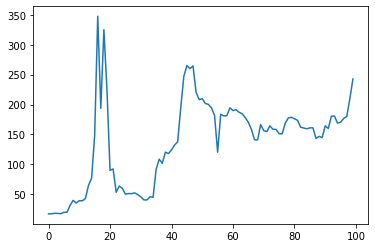

In [266]:
plt.plot(train_df['Close'].to_numpy())

---

## Data shifting
shift the training data backward for 1 step. 

---

In [267]:
train_df['lag_1']=train_df['Close'].shift(1)

---

shift the training data backward for i step，and form the lag i as the column.

---

In [268]:
for i in range(2,8):
   train_df[f'lag_{i}']=train_df['Close'].shift(i)
train_df.head(20)           

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-04,17.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,17.370001,17.250000,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,18.360001,17.370001,17.250000,NaN,NaN,NaN,NaN,NaN
2021-01-07,18.080000,18.360001,17.370001,17.250000,NaN,NaN,NaN,NaN
2021-01-08,17.690001,18.080000,18.360001,17.370001,17.250000,NaN,NaN,NaN
2021-01-11,19.940001,17.690001,18.080000,18.360001,17.370001,17.250000,NaN,NaN
2021-01-12,19.950001,19.940001,17.690001,18.080000,18.360001,17.370001,17.250000,NaN
2021-01-13,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001,17.370001,17.250000
2021-01-14,39.910000,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001,17.370001


In [269]:
train_df=train_df.dropna()
train_df.head(20)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-13,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001,17.370001,17.250000
2021-01-14,39.910000,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001,17.370001
2021-01-15,35.500000,39.910000,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001
2021-01-19,39.360001,35.500000,39.910000,31.400000,19.950001,19.940001,17.690001,18.080000
2021-01-20,39.119999,39.360001,35.500000,39.910000,31.400000,19.950001,19.940001,17.690001
2021-01-21,43.029999,39.119999,39.360001,35.500000,39.910000,31.400000,19.950001,19.940001
2021-01-22,65.010002,43.029999,39.119999,39.360001,35.500000,39.910000,31.400000,19.950001
2021-01-25,76.790001,65.010002,43.029999,39.119999,39.360001,35.500000,39.910000,31.400000
2021-01-26,147.979996,76.790001,65.010002,43.029999,39.119999,39.360001,35.500000,39.910000


---

Set A as previous 7 days data, and y as the Close price at the 8th day. 

---

In [270]:
cols=[f'lag_{i}'for i in range(1,8)]
A=train_df[cols].to_numpy()
y=train_df['Close'].to_numpy()

---

Calculate the $\hat{w}$, where $\hat{w}$ is the regression coefficient on scale factor, and it is equivalent to the slope in the linear regression equation. 

---

In [271]:
w_hat=np.linalg.inv(A.T @ A)@ A.T @ y
#w_hat=(A^TA)^-1 A^Ty
w_hat

array([ 0.75798335,  0.48217987, -0.047915  , -0.52833466,  0.09968373,
        0.21386942,  0.02090705])

---

## Make prediction without the Bias
Use $\hat{y} = A * \hat{w}$ to calculate the prediciton value without the Bias. 

---

In [272]:
train_df['predictions'] = A@w_hat

---

## Visualize the prediction result without Bias
Plot the actual close data and predicitons data.

---

<ipython-input-273-3e4cbeea67fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Date'] = plot_data.index


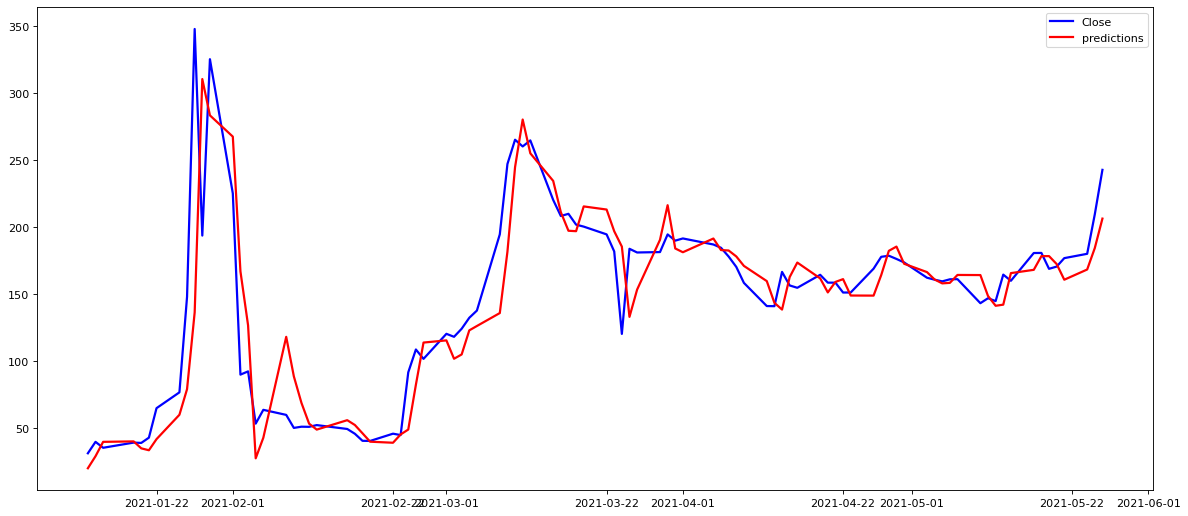

In [273]:
from matplotlib.pyplot import figure
figure(figsize=(18, 8), dpi=80)
plot_data = train_df[['Close', 'predictions']]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.plot( 'Date','predictions', data=plot_data, marker='', color='red', linewidth=2)
plt.legend()
plt.show()

In [274]:
data.head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,19.100000,17.150000,19.000000,17.250000,10022500,17.250000
2021-01-05,18.080000,17.230000,17.350000,17.370001,4961500,17.370001
2021-01-06,18.980000,17.330000,17.340000,18.360001,6056200,18.360001
2021-01-07,19.450001,18.020000,18.469999,18.080000,6129300,18.080000
2021-01-08,18.299999,17.080000,18.180000,17.690001,6482000,17.690001
2021-01-11,20.650000,19.010000,19.410000,19.940001,14908000,19.940001
2021-01-12,20.400000,19.320000,19.959999,19.950001,7060700,19.950001
2021-01-13,38.650002,20.030001,20.420000,31.400000,144501700,31.400000
2021-01-14,43.060001,33.049999,38.090000,39.910000,93717400,39.910000


---

## Linear Regression Prediction with Bias
Create a column with all one in it. 

---

In [275]:
train_df['ones'] = np.ones(len(train_df['Close']))
train_df.head(20)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,predictions,ones
Date,,,,,,,,,,
2021-01-13,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001,17.370001,17.250000,20.242280,1.0
2021-01-14,39.910000,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001,17.370001,29.210580,1.0
2021-01-15,35.500000,39.910000,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001,39.914683,1.0
2021-01-19,39.360001,35.500000,39.910000,31.400000,19.950001,19.940001,17.690001,18.080000,40.256443,1.0
2021-01-20,39.119999,39.360001,35.500000,39.910000,31.400000,19.950001,19.940001,17.690001,35.072707,1.0
2021-01-21,43.029999,39.119999,39.360001,35.500000,39.910000,31.400000,19.950001,19.940001,33.657740,1.0
2021-01-22,65.010002,43.029999,39.119999,39.360001,35.500000,39.910000,31.400000,19.950001,41.948057,1.0
2021-01-25,76.790001,65.010002,43.029999,39.119999,39.360001,35.500000,39.910000,31.400000,60.085794,1.0
2021-01-26,147.979996,76.790001,65.010002,43.029999,39.119999,39.360001,35.500000,39.910000,79.172139,1.0


In [276]:
cols = [f'lag_{i}' for i in range (1,8)]
cols.append('ones')
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'ones']

In [277]:
train_df[cols].head(20)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ones
Date,,,,,,,,
2021-01-13,19.950001,19.940001,17.690001,18.080000,18.360001,17.370001,17.250000,1.0
2021-01-14,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001,17.370001,1.0
2021-01-15,39.910000,31.400000,19.950001,19.940001,17.690001,18.080000,18.360001,1.0
2021-01-19,35.500000,39.910000,31.400000,19.950001,19.940001,17.690001,18.080000,1.0
2021-01-20,39.360001,35.500000,39.910000,31.400000,19.950001,19.940001,17.690001,1.0
2021-01-21,39.119999,39.360001,35.500000,39.910000,31.400000,19.950001,19.940001,1.0
2021-01-22,43.029999,39.119999,39.360001,35.500000,39.910000,31.400000,19.950001,1.0
2021-01-25,65.010002,43.029999,39.119999,39.360001,35.500000,39.910000,31.400000,1.0
2021-01-26,76.790001,65.010002,43.029999,39.119999,39.360001,35.500000,39.910000,1.0


---

Introduce a bias(intercept) into the linear equation. 

---

In [278]:
A_bias = train_df[cols].to_numpy()
w_hat_bias = np.linalg.inv(A_bias.T @ A_bias) @ A_bias.T @ y

In [279]:
train_df['predictionswithbias'] = A_bias @ w_hat_bias

---

## Visualize the prediction result with Bias
Plot the actual close data, predicitons data and predictions data with bias.

---

<ipython-input-280-f47b6e40c846>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Date'] = plot_data.index


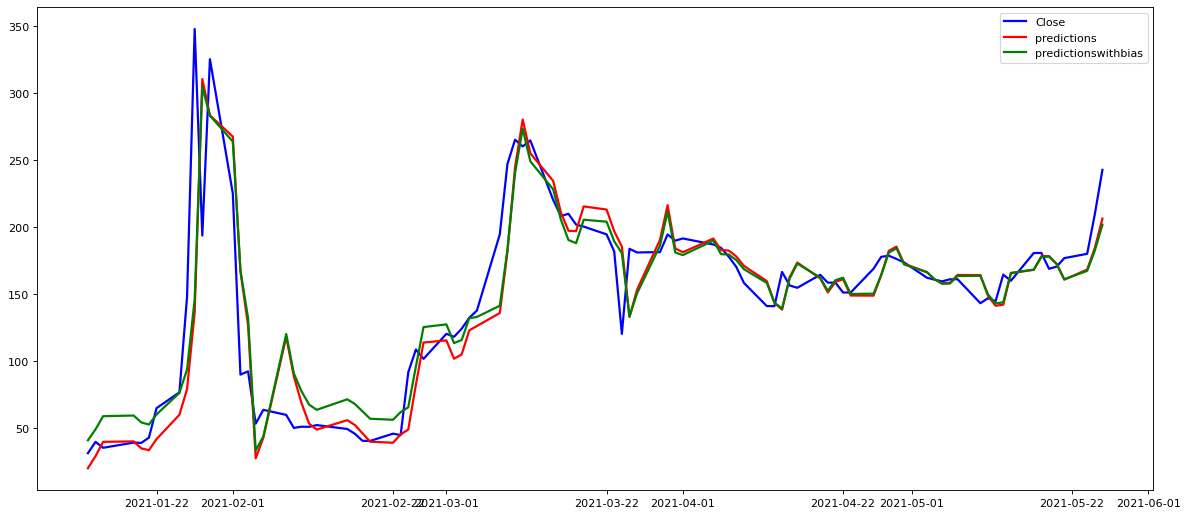

In [280]:
from matplotlib.pyplot import figure
figure(figsize=(18, 8), dpi=80)
plot_data = train_df[['Close', 'predictions', "predictionswithbias"]]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.plot( 'Date','predictions', data=plot_data, marker='', color='red', linewidth=2)
plt.plot( 'Date','predictionswithbias', data=plot_data, marker='', color='green', linewidth=2)
plt.legend()
plt.show()

---

Calculate the MSE for both result. 

---

In [281]:
y
y_hat1 = train_df['predictions'].to_numpy()
y_hat2 = train_df['predictionswithbias'].to_numpy()

In [282]:
def RMSE(labels, predictions):
  return np.sqrt((labels - predictions)@(labels - predictions))

In [283]:
print(f'In-Sample MSRE_without_bias ={RMSE(y, y_hat1)}')
print(f'In-Sample MSRE_with_bias ={RMSE(y, y_hat2)}')

In-Sample MSRE_without_bias =330.20567886313137
In-Sample MSRE_with_bias =318.9523585841354


---

## Log-Shrinkage

Apply the log transformation to the data points

---

In [284]:
data['log_Close'] = np.log(data['Close'])

---


## Visualize the data points

---

<ipython-input-285-82f981810a01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Date'] = plot_data.index


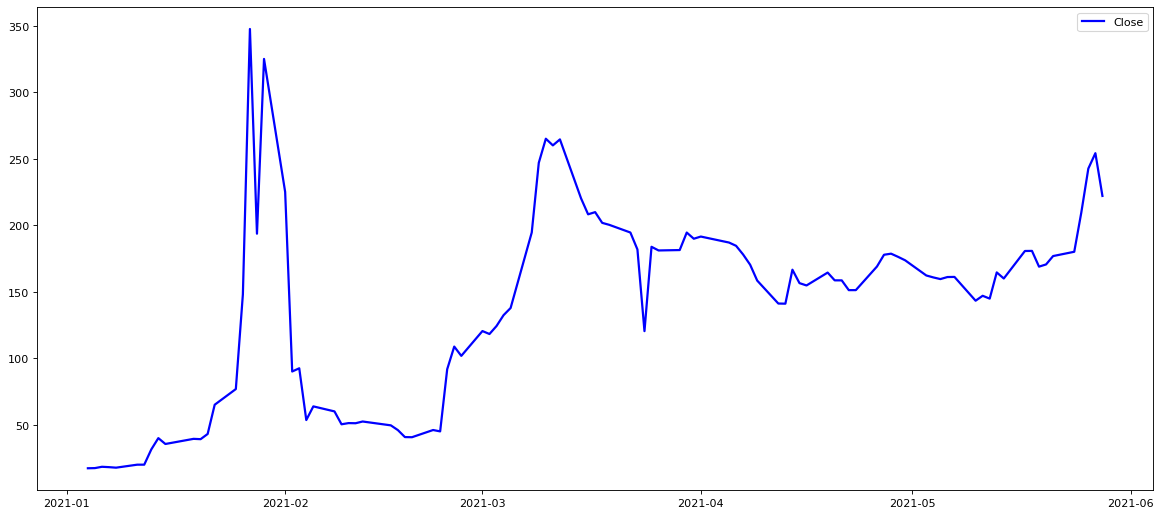

In [285]:
from matplotlib.pyplot import figure
figure(figsize=(18, 8), dpi=80)
plot_data = data[['Close']]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.legend()
plt.show()

In [286]:
test_df = data['Close'].iloc[-31: ]
test_df = pd.DataFrame(test_df)

In [287]:
cols = []
for i in range (1,8):
  test_df [f'lag_{i}'] = test_df['Close'].shift(i)
  cols.append(f'lag_{i}')
test_df = test_df.dropna()
test_df['ones']= np.ones(len(test_df['Close']))
cols.append('ones')


In [288]:
test_df['predictions'] = test_df[cols].to_numpy()@w_hat_bias

In [289]:
y = test_df['Close'].to_numpy()
y_hat = test_df['predictions'].to_numpy()
print(f'MSRE = {MSRE(y, y_hat)}')

MSRE = 75.56304572096118


<ipython-input-290-8611d21fe97b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Date'] = plot_data.index


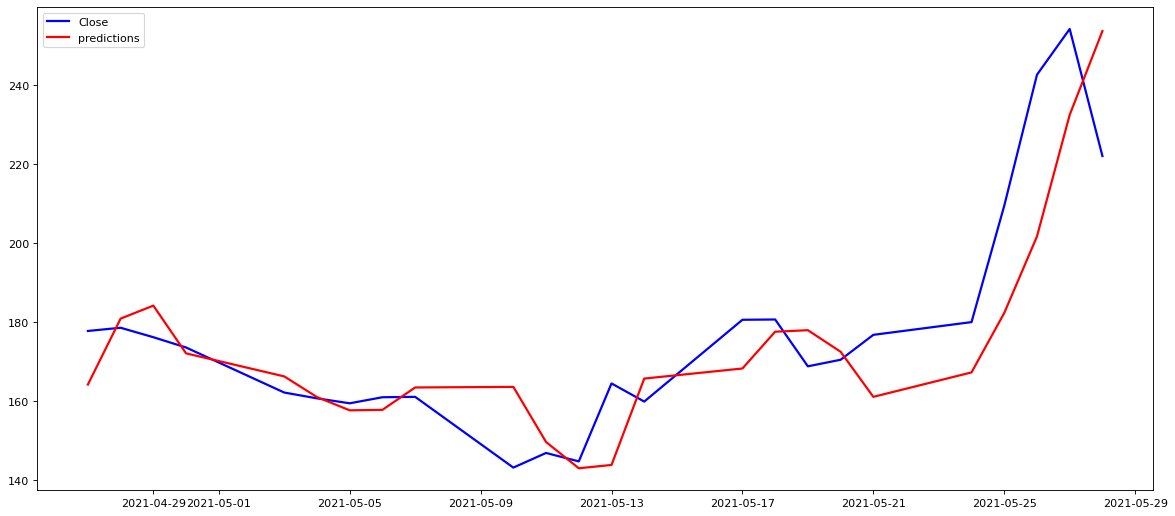

In [290]:
from matplotlib.pyplot import figure
figure(figsize=(18, 8), dpi=80)
plot_data = test_df[['Close', 'predictions']]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.plot( 'Date','predictions', data=plot_data, marker='', color='red', linewidth=2)
plt.legend()
plt.show()

In [291]:
test_df['lag1'] = test_df['Close'].shift(1)
test_df = test_df.dropna()
test_df['diff'] = test_df['Close'] - test_df['lag1']
test_df.head(20)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ones,predictions,lag1,diff
Date,,,,,,,,,,,,
2021-04-28,178.580002,177.770004,168.929993,151.179993,151.169998,158.509995,158.529999,164.369995,1.0,180.895189,177.770004,0.809998
2021-04-29,176.190002,178.580002,177.770004,168.929993,151.179993,151.169998,158.509995,158.529999,1.0,184.179928,178.580002,-2.389999
2021-04-30,173.589996,176.190002,178.580002,177.770004,168.929993,151.179993,151.169998,158.509995,1.0,172.108613,176.190002,-2.600006
2021-05-03,162.199997,173.589996,176.190002,178.580002,177.770004,168.929993,151.179993,151.169998,1.0,166.278888,173.589996,-11.389999
2021-05-04,160.729996,162.199997,173.589996,176.190002,178.580002,177.770004,168.929993,151.179993,1.0,161.055827,162.199997,-1.470001
2021-05-05,159.479996,160.729996,162.199997,173.589996,176.190002,178.580002,177.770004,168.929993,1.0,157.703826,160.729996,-1.250000
2021-05-06,161.009995,159.479996,160.729996,162.199997,173.589996,176.190002,178.580002,177.770004,1.0,157.823220,159.479996,1.529999
2021-05-07,161.110001,161.009995,159.479996,160.729996,162.199997,173.589996,176.190002,178.580002,1.0,163.482702,161.009995,0.100006
2021-05-10,143.220001,161.110001,161.009995,159.479996,160.729996,162.199997,173.589996,176.190002,1.0,163.630630,161.110001,-17.889999


In [292]:
diff_df = pd.DataFrame(test_df['diff'])
diff_df = diff_df.dropna()

In [293]:
for i in range(1,8): 
    diff_df[f'lag_{i}'] = diff_df['diff'].shift(i)
    cols.append(f'lag_{i}')
diff_df.dropna()
cols.append('ones')
diff_df['ones'] = np.ones(len(test_df['Close']))


A = diff_df[cols].to_numpy()
y = diff_df['diff']
w_hat = np.linalg.inv(A.T@A)@A.T@y
y_hat = A @ w_hat
diff_df['predictions'] = y_hat



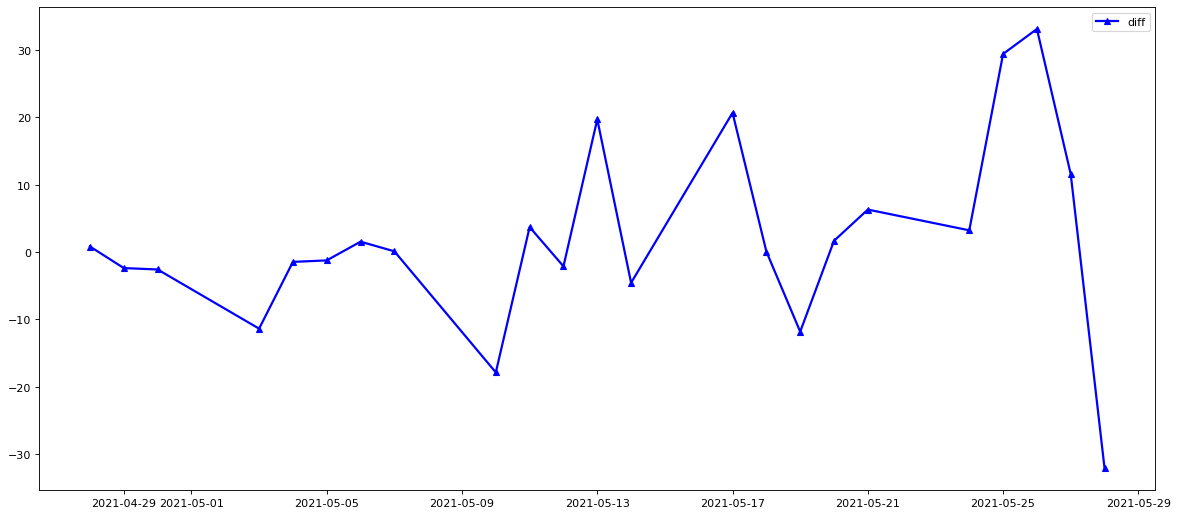

In [294]:
from matplotlib.pyplot import figure
figure(figsize=(18, 8), dpi=80)
plot_data = diff_df
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'diff', data= plot_data, marker='^', markerfacecolor='blue', color='blue', linewidth=2)
plt.legend()
plt.show()

---

From the result above, we can notice that the MSE calculated with bias is lower than the MSE calculated without bias. Therefore, The model with bias is better. However, the last model with the method of log-shrinkage has the lowest MSE in all of three models. 

---